from param_analysis import ParameterAnalysis
from plots import *

In [1]:
from param_analysis import ParameterAnalysis
from plots import *
from analysis_utils import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
connectedness_values = [0.4, 0.6, 0.8]
ecb_precision_gammas = [4, 5, 6, 7, 8, 9]

#num_agent_values = [3,5,8]
num_agent_values = [5, 10]

n = len(num_agent_values)
c = len(connectedness_values)
#precision_ranges = [[1,2],[1,5],[1,9],[6,7],[6,10]]
env_precision_gammas = [9]
b_precision_gammas = [3, 4, 5, 6, 7, 8, 9]
lr = [0.01, 0.1, 0.3, 0.5, 0.8, 1]

variances = [0.1, 0.3, 0.5, 0.8, 1]

r_len = len(ecb_precision_gammas)
e_len = len(env_precision_gammas)
b_len = len(b_precision_gammas)
v_len = len(variances)
lr_len = len(lr)
n_trials = 1


In [3]:
params = ParameterAnalysis('results/large_sweep_results.npz','', num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, lr, variances, n_trials)

In [4]:
params.n_d.value = num_agent_values[1]
params.env_d.value = env_precision_gammas[0]
params.b_d.value = b_precision_gammas[0]
params.c_d.value = connectedness_values[1]
params.ecb_d.value = ecb_precision_gammas[-2]
params.v_d.value = variances[0]
params.lr_d.value = lr[0]

In [5]:
params.get_overall_metrics()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sophiawd/Desktop/Daphne/active_inference_opinion_dynamics/Analysis/param_analysis.py:133: RuntimeWarning: Mean of empty slice
  self.insider_outsider_ratios[i,:] = np.nanmean(np.array([cm.get_sampling_ratios(self.all_qs[i], self.adj_mat[i], self.all_neighbour_samplings[i]) for i in range(self.n_trials)]),axis=0)


In [38]:
relevant_indices = [ idx for idx, i in enumerate(params.insider_outsider_ratios) if not np.isnan(i[0])]

In [45]:
relevant_indices

[173,
 177,
 178,
 214,
 1583,
 1718,
 1724,
 1725,
 1727,
 1759,
 4566,
 4785,
 6115,
 6225,
 6262,
 7739,
 7805]

In [60]:
relevant_params = np.array(list(params.get_param_combinations()))[relevant_indices]

In [61]:
relevant_params

array([[ 5.  ,  0.4 ,  4.  ,  7.  ,  9.  ,  0.8 ,  1.  ],
       [ 5.  ,  0.4 ,  4.  ,  7.  ,  9.  ,  1.  ,  0.5 ],
       [ 5.  ,  0.4 ,  4.  ,  7.  ,  9.  ,  1.  ,  0.8 ],
       [ 5.  ,  0.4 ,  4.  ,  8.  ,  9.  ,  1.  ,  0.8 ],
       [ 5.  ,  0.6 ,  4.  ,  4.  ,  9.  ,  1.  ,  1.  ],
       [ 5.  ,  0.6 ,  4.  ,  8.  ,  9.  ,  0.8 ,  0.3 ],
       [ 5.  ,  0.6 ,  4.  ,  8.  ,  9.  ,  1.  ,  0.3 ],
       [ 5.  ,  0.6 ,  4.  ,  8.  ,  9.  ,  1.  ,  0.5 ],
       [ 5.  ,  0.6 ,  4.  ,  8.  ,  9.  ,  1.  ,  1.  ],
       [ 5.  ,  0.6 ,  4.  ,  9.  ,  9.  ,  1.  ,  0.1 ],
       [10.  ,  0.4 ,  4.  ,  3.  ,  9.  ,  1.  ,  0.01],
       [10.  ,  0.4 ,  4.  ,  9.  ,  9.  ,  1.  ,  0.5 ],
       [10.  ,  0.6 ,  4.  ,  4.  ,  9.  ,  1.  ,  0.1 ],
       [10.  ,  0.6 ,  4.  ,  7.  ,  9.  ,  1.  ,  0.5 ],
       [10.  ,  0.6 ,  4.  ,  8.  ,  9.  ,  1.  ,  0.8 ],
       [10.  ,  0.8 ,  4.  ,  7.  ,  9.  ,  1.  ,  1.  ],
       [10.  ,  0.8 ,  4.  ,  9.  ,  9.  ,  0.8 ,  1.  ]])

In [ ]:
test_params = [5, 0.6, 7, 9, 9, 2, 0.3]

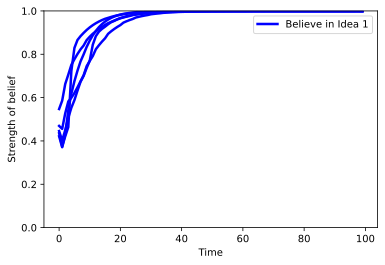

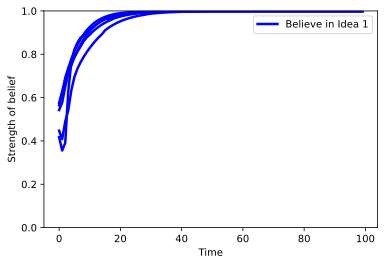

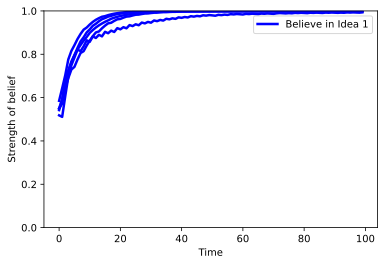

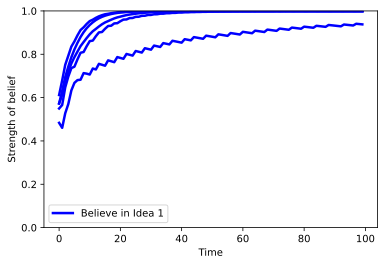

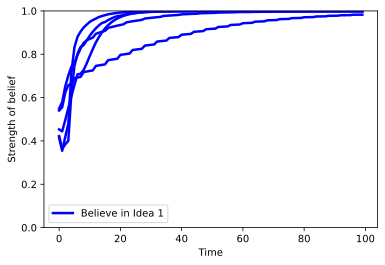

In [59]:
for r in np.array(list(params.get_param_combinations()))[[100,101,102,103,104]]:
    params.update_params(r)
    params.get_all_sim_results_from_parameters()
    plots.plot_beliefs_over_time(params.all_qs[0])
    plt.show()

In [6]:
idx = (np.where((params.insider_outsider_ratios[:,-1] > 0) & (params.insider_outsider_ratios[:,-1] <3)))[0]

In [7]:
interesting_ratios = params.insider_outsider_ratios[( params.insider_outsider_ratios[:,-1]> 0) & (params.insider_outsider_ratios[:,-1] < 3)]

In [8]:
%config InlineBackend.figure_format = 'svg'


In [9]:
plt.scatter(params.cluster_kls[indices][indices2], interesting_ratios[:,-1])
plt.title("Scatterplot of Insider-Outsider Sampling Ratio to Cluster KL Divergence")
plt.xlabel("Cluster KL")
plt.ylabel("Insider Outsider sampling ratio")

NameError: name 'indices' is not defined

In [16]:
all_params = list(params.get_param_combinations())
all_sampling_data = {}
for idx, p in enumerate(all_params):
    params.update_params(p)
    params.get_all_sim_results_from_parameters()
    all_sampling_data = sampling_data(all_sampling_data, idx, p, params.all_qs, params.adj_mat, params.all_neighbour_samplings)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [11]:
#this is where we have the most periodic behaviour
periodic_indices = np.where((np.absolute(interesting_ratios[:,-1] - interesting_ratios[:,0])) < 0.1)

In [12]:
periodic_indices

(array([0, 1, 7, 9]),)

In [13]:
print("Parameter Configurations for periodic sampling behaviour")
#num_agents_i, connectedness_i, ecb_p_i, env_precision_i, b_precision_i, v_i, lr_i
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(np.array(all_params)[idxs[periodic_indices]][:,2])
axs[0, 0].set_title("ECB Precision")
axs[1, 1].hist(np.array(all_params)[idxs[periodic_indices]][:,3])
axs[1, 1].set_title("Belief Determinism")
axs[0, 1].hist(np.array(all_params)[idxs[periodic_indices]][:,5])
axs[0, 1].set_title("Variance")
axs[1,0].hist(np.array(all_params)[idxs[periodic_indices]][:,6])
axs[1,0].set_title("Learning Rate")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

Parameter Configurations for periodic sampling behaviour


NameError: name 'all_params' is not defined

In [158]:
insider_dominates_indices = np.where((interesting_ratios[:,-1] - interesting_ratios[:,0]) < -0.3)

Parameter Configurations where insider sampling behaviour dominates


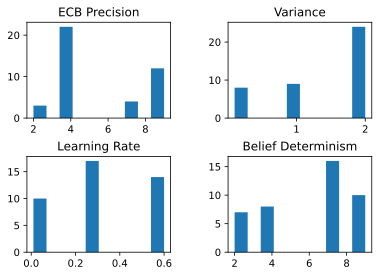

In [159]:
print("Parameter Configurations where insider sampling behaviour dominates")
#num_agents_i, connectedness_i, ecb_p_i, env_precision_i, b_precision_i, v_i, lr_i
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(np.array(all_params)[idxs[insider_dominates_indices]][:,2])
axs[0, 0].set_title("ECB Precision")
axs[1, 1].hist(np.array(all_params)[idxs[insider_dominates_indices]][:,3])
axs[1, 1].set_title("Belief Determinism")
axs[0, 1].hist(np.array(all_params)[idxs[insider_dominates_indices]][:,5])
axs[0, 1].set_title("Variance")
axs[1,0].hist(np.array(all_params)[idxs[insider_dominates_indices]][:,6])
axs[1,0].set_title("Learning Rate")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [160]:
outsider_dominates_indices = np.where((interesting_ratios[:,-1] - interesting_ratios[:,0]) > 0.5)

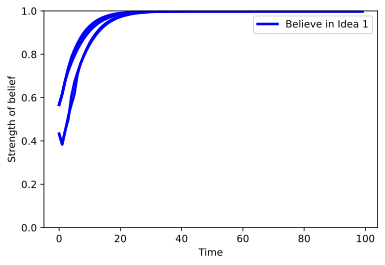

In [21]:
import plots
plots.plot_beliefs_over_time(params.all_qs[0])


Parameter Configurations where insider sampling behaviour dominates


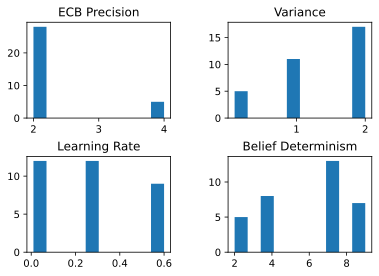

In [161]:
print("Parameter Configurations where insider sampling behaviour dominates")
#num_agents_i, connectedness_i, ecb_p_i, env_precision_i, b_precision_i, v_i, lr_i
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(np.array(all_params)[idxs[outsider_dominates_indices]][:,2])
axs[0, 0].set_title("ECB Precision")
axs[1, 1].hist(np.array(all_params)[idxs[outsider_dominates_indices]][:,3])
axs[1, 1].set_title("Belief Determinism")
axs[0, 1].hist(np.array(all_params)[idxs[outsider_dominates_indices]][:,5])
axs[0, 1].set_title("Variance")
axs[1,0].hist(np.array(all_params)[idxs[outsider_dominates_indices]][:,6])
axs[1,0].set_title("Learning Rate")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [178]:
insider_dominates_indices

(array([  2,  18,  20,  23,  26,  27,  28,  30,  52,  54,  59,  60,  63,
         75,  77,  78,  79,  80,  83, 122, 144, 147, 166, 169, 171, 174,
        176, 212, 222, 238, 245, 249, 251, 256, 262, 263, 266, 295, 299,
        302, 315]),)

In [206]:
ratio_params = all_params[idxs[238]]

In [207]:
ratio_params

(5, 0.5, 7, 9, 9, 2, 0.3)

In [208]:
optimal_params = ratio_params
params.update_params(optimal_params)
params.get_all_sim_results_from_parameters()
beliefs = params.all_qs

x = all_params.index(tuple(optimal_params))

In [209]:
trials = all_sampling_data[x].keys()

In [210]:
trials

dict_keys([19, 22])

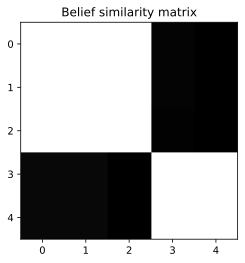

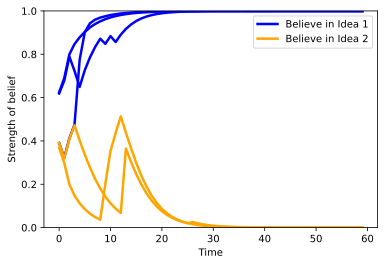

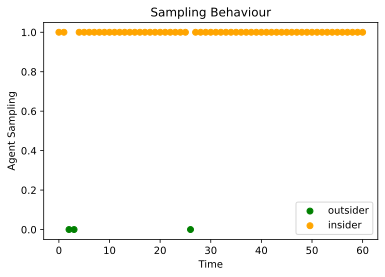

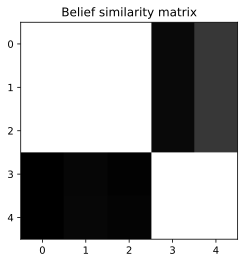

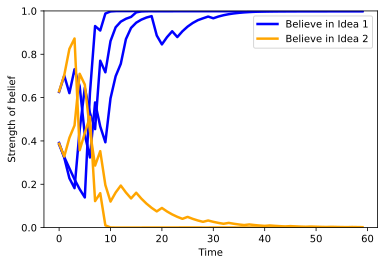

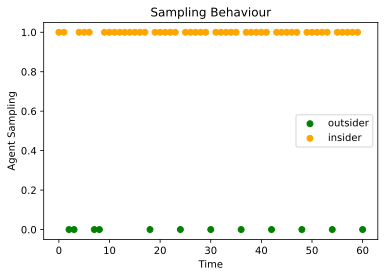

In [211]:
import plots 
for t in trials:
    similarity_matrix(beliefs[t])
    plots.plot_beliefs_over_time(beliefs[t])
    plt.show()
    outsider_indices = [all_sampling_data[x][t][list(all_sampling_data[x][t].keys())[i]]["outsider_indices"] for i in range(len(list(all_sampling_data[x][t].keys())))]
    insider_indices = [all_sampling_data[x][t][list(all_sampling_data[x][t].keys())[i]]["insider_indices"]  for i in range(len(list(all_sampling_data[x][t].keys())))]
    outsider_neighbours = [all_sampling_data[x][t][list(all_sampling_data[x][t].keys())[i]]["outsider_neighbours"] for i in range(len(list(all_sampling_data[x][t].keys())))]
    insider_neighbours = [all_sampling_data[x][t][list(all_sampling_data[x][t].keys())[i]]["insider_neighbours"] for i in range(len(list(all_sampling_data[x][t].keys())))]
    #for i in range(len(list(all_sampling_data[x][t].keys()))):
    for i in [0]:
        plot_samples(outsider_indices[i], insider_indices[i], outsider_neighbours[i], insider_neighbours[i])
    plt.show()



In [ ]:
all_param

In [301]:
clustering_data = {}

for ecb in ecb_precision_gammas:
    #find all parameter combinations with this connectedness value
    ecb_indices = np.where(np.isin(np.array(list(params.get_param_combinations()))[:,2],ecb))[0]
    #what are the db indices for these parameters?
    ecb_db_indices = params.db_indices[ecb_indices]
    
    #what is the smallest one?
    lowest_db_index = np.where(ecb_db_indices == min(ecb_db_indices))[0][0]
    highest_db_index = np.where(ecb_db_indices == max(ecb_db_indices))[0][0]

    
    #print(c_db_indices[lowest_db_index])
        #what is the parameter combination that results in the smallest one?
    optimal_params = list(params.get_param_combinations())[ecb_indices[lowest_db_index]]
    suboptimal_params = list(params.get_param_combinations())[ecb_indices[highest_db_index]]
    #(ecb_precision_opt, env_precision_opt, b_precision_opt),idea_mappings_opt = get_params(optimal_params)
    #(ecb_precision_sopt, env_precision_sopt, b_precision_sopt),idea_mappings_sopt = get_params(suboptimal_params)

    
    clustering_data[ecb] = {"optimal_params" : optimal_params, "lowest_db":ecb_db_indices[lowest_db_index],
                       #   "real_params_opt" : (ecb_precision_opt, env_precision_opt, b_precision_opt),
                          
                         "suboptimal_params": suboptimal_params, "highest_db" : ecb_db_indices[highest_db_index]}
                         
                      #   "real_params_subopt": (ecb_precision_sopt, env_precision_sopt, b_precision_sopt) }



In [302]:
clustering_data

{2: {'optimal_params': (3, 0.5, 2, 4, 9, 0.1, 0.3),
  'lowest_db': 0.008167170407524306,
  'suboptimal_params': (3, 0.2, 2, 2, 9, 2, 0.01),
  'highest_db': 0.4316919357541292},
 4: {'optimal_params': (5, 0.2, 4, 4, 9, 2, 0.01),
  'lowest_db': 0.5018642050041181,
  'suboptimal_params': (3, 0.2, 4, 2, 9, 0.1, 0.3),
  'highest_db': 1.0},
 7: {'optimal_params': (5, 0.8, 7, 4, 9, 2, 0.6),
  'lowest_db': 0.7363720282729094,
  'suboptimal_params': (3, 0.2, 7, 2, 9, 0.1, 0.01),
  'highest_db': 1.0},
 9: {'optimal_params': (5, 0.5, 9, 2, 9, 0.1, 0.3),
  'lowest_db': 0.7666689667568956,
  'suboptimal_params': (3, 0.2, 9, 2, 9, 0.1, 0.01),
  'highest_db': 1.0}}

In [95]:

#num agents, connectedness, ecb precision, env precision, b precision, lr, variance 
optimal_params = [5, 0.8, 7, 4, 9, 2, 0.6]
params.update_params(optimal_params)
params.get_all_sim_results_from_parameters()
beliefs = params.all_qs

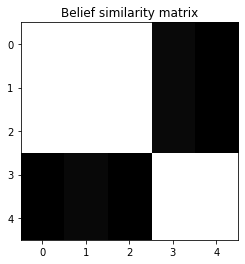

<Figure size 432x288 with 0 Axes>

In [333]:
kld_matrices = similarity_matrix(beliefs[2])

In [24]:
def get_agent_data(agent, result, cluster1, cluster2):
    agent_adj_mat = result['adj_mat'][:,agent,:]
    agent_beliefs = result['all_qs'][:,:,:,agent]
    agent_samplings = result['all_neighbour_sampling'][:,:,agent]
    agent_tweets = result['all_tweets'][:,:,agent]
    agent_cluster = cluster1[0] if agent in cluster1[0] else cluster2[0]
    other_cluster = cluster1[0] if agent not in cluster1[0] else cluster2[0]
    neighbours = list(is_connected(agent_adj_mat[0])[0])
    outsider_neighbours = np.intersect1d(neighbours, other_cluster)
    insider_neighbours = np.intersect1d(neighbours, agent_cluster)
    
    agent_data = (agent_adj_mat, agent_beliefs, agent_samplings, agent_tweets, agent_cluster, other_cluster, neighbours, outsider_neighbours, insider_neighbours)
    return agent_data

def find_one_agent_two_neighbours_opposite_cluster(parameters, condition = True, trial = None, agent = None):
    params.update_params(parameters)
    beliefs = params.all_qs
    result = params.get_all_sim_results_from_parameters()
    if condition == True:
        for trial in range(30):
                #what are the clusters? 
            all_beliefs_t = beliefs[trial]
            cluster1 = np.where(all_beliefs_t[-1,1,:] > 0.5)
            cluster2 = np.where(all_beliefs_t[-1,1,:] < 0.5)
            for agent in range(parameters[0]):
                agent_data = get_agent_data(agent,result, cluster1, cluster2)
                if len(agent_data[-3]) == 2 and len(agent_data[-2]) == 1 and len(agent_data[-1]) == 1:
                    print("Found condition!")
                    print(cluster1)
                    print(cluster2)
                    return result, trial, agent, cluster1, cluster2, agent_data
    else:
        all_beliefs_t = beliefs[trial,:,:,:] 
        cluster1 = np.where(all_beliefs_t[-1,1,:] > 0.5)
        cluster2 = np.where(all_beliefs_t[-1,1,:] < 0.5)
        agent_data = get_agent_data(agent,result, cluster1, cluster2)
                    
        return result, trial, agent, cluster1, cluster2, agent_data
            

In [25]:
def is_connected(adj_mat):
    return np.where(adj_mat == 1)

In [426]:
test_params = all_params[1]
params.update_params(test_params)
beliefs = params.all_qs


In [344]:
result, trial, agent, cluster1, cluster2, agent_data = find_one_agent_two_neighbours_opposite_cluster(test_params)

Found condition!
(array([0, 3, 4]),)
(array([1, 2]),)


In [439]:
result, trial, agent, cluster1, cluster2, agent_data = find_one_agent_two_neighbours_opposite_cluster(test_params, False, 4, 0)

In [440]:
trial

4

In [441]:
(agent_adj_mat, agent_beliefs, agent_samplings, agent_tweets, agent_cluster, other_cluster, neighbours, outsider_neighbours, insider_neighbours) = agent_data

In [442]:
agent_samplings[trial]

array([1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1.,
       1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2.,
       1., 1., 2., 1., 1., 2., 1., 1., 2., 1.])

In [443]:
outsider_indices = [np.where(agent_samplings[trial] == i) for i in outsider_neighbours]
insider_indices = [np.where(agent_samplings[trial] == i) for i in insider_neighbours]

In [444]:
insider_indices

[(array([ 0,  1,  3,  4,  6,  7,  9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21,
         22, 24, 25, 27, 28, 30, 31, 33, 34, 36, 37, 39, 40, 42, 43, 45, 46,
         48, 49, 51, 52, 54, 55, 57, 58, 60]),)]

In [89]:
def sampling_data(all_sampling_data, idx, parameters, all_qs, adj_mat, all_samplings):
    all_sampling_data[idx] = {}
    for trial in range(30):
        #print()
        #print("trial: "  + str(trial))
            #what are the clusters? 
        cluster1 = np.where(all_qs[trial][-1,1,:] > 0.5)
        cluster2 = np.where(all_qs[trial][-1,1,:] < 0.5)
        if len(cluster1[0]) > 0 and len(cluster2[0]) > 0:
            all_sampling_data[idx][trial] = {}

            for agent in range(parameters[0]):
                #print("Agent: " + str(agent))
                agent_cluster = cluster1[0] if agent in cluster1[0] else cluster2[0]
                other_cluster = cluster1[0] if agent not in cluster1[0] else cluster2[0]
                try:
                    neighbours = list(np.where(adj_mat[:,agent,:][0] ==1)[0])
                except:
                    print(agent)
                    print(adj_mat.shape)
                    print(p)
                outsider_neighbours = np.intersect1d(neighbours, other_cluster)
                insider_neighbours = np.intersect1d(neighbours, agent_cluster)
                if len(outsider_neighbours) > 0 and len(insider_neighbours) > 0:
                    agent_samplings = all_samplings[:,:,agent][trial]
                    outsider_indices = [np.where(agent_samplings == i) for i in outsider_neighbours]
                    insider_indices = [np.where(agent_samplings == i) for i in insider_neighbours]
                    all_sampling_data[idx][trial][agent] = {}
                    for j in range(len(outsider_indices)):
                        #outsider_freq = [outsider_indices[j][0][i+1]-outsider_indices[j][0][i] for i in range(len(outsider_indices[j][0])-1)]
                        #print("outsider frequency: " + str(outsider_freq))
                        all_sampling_data[idx][trial][agent]["outsider_indices"] = []
                        all_sampling_data[idx][trial][agent]["outsider_indices"].append(outsider_indices[j][0])
                        all_sampling_data[idx][trial][agent]["outsider_neighbours"] = outsider_neighbours

                    for k in range(len(insider_indices)):
                        #insider_freq = [insider_indices[k][0][i+1]-insider_indices[k][0][i] for i in range(len(insider_indices[k][0])-1)]
                        #print("insider frequency: " + str(insider_freq))
                        all_sampling_data[idx][trial][agent]["insider_indices"] = []
                        all_sampling_data[idx][trial][agent]["insider_indices"].append(insider_indices[k][0])
                        all_sampling_data[idx][trial][agent]["insider_neighbours"] = insider_neighbours

    return all_sampling_data

        

In [501]:
params

In [91]:
all_params = list(params.get_param_combinations())
all_sampling_data = {}
for idx, p in enumerate(all_params):
    params.update_params(p)
    params.get_all_sim_results_from_parameters()
    all_sampling_data = sampling_data(all_sampling_data, idx, p, params.all_qs, params.adj_mat, params.all_neighbour_samplings)


In [22]:
x = all_params.index(tuple(optimal_params))

In [23]:
x

30

In [24]:
all_sampling_data[x]

hbours': array([0]),
   'insider_indices': [array([ 0,  1,  4,  6,  8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
           23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
           41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58,
           59, 60])],
   'insider_neighbours': array([2])},
  2: {'outsider_indices': [array([ 2,  4,  5,  7, 10, 18, 27, 52])],
   'outsider_neighbours': array([0]),
   'insider_indices': [array([ 0,  1,  3,  6,  8,  9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22,
           23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
           41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58,
           59, 60])],
   'insider_neighbours': array([1])}},
 7: {0: {'outsider_indices': [array([ 2,  4,  5,  6,  7,  8,  9, 11, 12, 14, 15, 17, 18, 19, 21, 22, 23,
           24, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43,
           44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 

In [34]:
outsider_indices = all_sampling_data[x][10][2]["outsider_indices"]
insider_indices = all_sampling_data[x][10][2]["insider_indices"]
outsider_neighbours = all_sampling_data[x][10][2]["outsider_neighbours"]
insider_neighbours = all_sampling_data[x][10][2]["insider_neighbours"]


In [90]:
#plt.plot(range(61), agent_samplings[trial])
def plot_samples(outsider_indices, insider_indices, outsider_neighbours, insider_neighbours):
    if len(outsider_indices) > 0:
        for j in range(len(outsider_indices)):
            plt.scatter(outsider_indices[j], np.tile(0, len(outsider_indices[j])), color = 'green', label = "outsider")
    for i in range(len(insider_indices)):
        plt.scatter(insider_indices[i], np.tile(1, len(insider_indices[i])), color = 'orange', label = "insider")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Agent Sampling")
    plt.title("Sampling Behaviour")

In [328]:
agent_reads = [result['all_tweets'][trial,t,int(a)] for t,a in enumerate(agent_samplings[trial,:])]

In [ ]:
#average number of outsider samplings per agent at the final 20 timesteps 
#average over agents and trial 
#2d heat map of the ratios over beleif precision / learning rate / ecb precision 


#for just ecb precision could just have curves over time and y being the frequency sampling ratio 

#tensor of parameters (ecb, belief, learning rate) and then each entry is the average for fixed parameter respectively
#plt.imshow on a slice of that cube 


In [329]:
agent_reads

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0]

In [334]:
agent_samplings[trial]

array([2., 2., 3., 3., 2., 2., 2., 3., 2., 2., 3., 2., 3., 2., 3., 2., 3.,
       2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2.,
       2., 3., 2., 3., 2., 2., 3., 2., 3., 2., 2., 3., 2., 3., 2., 2., 3.,
       2., 3., 2., 2., 3., 2., 3., 2., 2., 3.])

In [335]:
behaviour = [( agent_tweets[trial][t], agent_reads[t], agent_beliefs[trial,:,0][t], (agent_beliefs[trial,:,0][t] - agent_beliefs[trial,:,0][t-1] )) for t in range(1,len(agent_reads)-1)]

In [336]:
behaviour

[(0.0, 1.0, 0.33307757013094874, -0.0729909708593906),
 (1.0, 1.0, 0.19710020232762507, -0.13597736780332367),
 (1.0, 1.0, 0.14462769595833844, -0.05247250636928663),
 (1.0, 1.0, 0.11088493310821501, -0.033742762850123426),
 (1.0, 0.0, 0.2984278536340421, 0.1875429205258271),
 (1.0, 0.0, 0.3750277762863262, 0.0765999226522841),
 (1.0, 1.0, 0.30546742492752277, -0.06956035135880345),
 (1.0, 1.0, 0.19220502333736822, -0.11326240159015455),
 (1.0, 0.0, 0.2358295637843525, 0.04362454044698427),
 (1.0, 1.0, 0.18500312714977463, -0.050826436634577865),
 (1.0, 0.0, 0.2167149144912907, 0.031711787341516084),
 (1.0, 1.0, 0.16978491676578783, -0.04692999772550288),
 (1.0, 0.0, 0.19888154239557973, 0.0290966256297919),
 (1.0, 1.0, 0.15506793009853306, -0.04381361229704667),
 (1.0, 0.0, 0.18213093456256405, 0.027063004464030982),
 (1.0, 1.0, 0.14128723200436497, -0.04084370255819908),
 (1.0, 0.0, 0.16639180367093312, 0.025104571666568154),
 (1.0, 1.0, 0.12844766965720528, -0.03794413401372784),
 (

So two general behaviours are possible: Either an agent will form a conclusion by choosing to more frequently sample within one cluster group than the other, or they will continue to sample from both cluster groups and remain centrist. In both cases, agents will choose their own leaning - only to tweet one hashtag over the other, but will continue to sample both leanings, to varying frequencies based on their beliefs.  

In [108]:
#make a line plot of the sampling effect 

sampling_data = np.zeros(len(b_precision_gammas))
for i, b in enumerate(b_precision_gammas):
    #find all parameter combinations with this connectedness value
    b_indices = np.where(np.isin(np.array(list(params.get_param_combinations()))[:,3],b))[0]
    parameters = [list(params.get_param_combinations())[b] for b in b_indices]
    average_outsider_sampling_events = []
    for p in parameters:
        try:
            for agent in range(p[0]):
                for t in range(30):
                    
                    result, trial, agent, cluster1, cluster2, agent_data = find_one_agent_two_neighbours_opposite_cluster(p, False, t, agent) 
                    agent_samplings = agent_data[2][t]
                    outsider_neighbours = agent_data[-2]
                    insider_neighbours = agent_data[-1]
                    if len(outsider_neighbours) != 0 and len(insider_neighbours) != 0 and len(outsider_neighbours) == len(insider_neighbours):
                        num_outsider_sampling_events = len(np.array([np.where(agent_samplings[-40:] == o)[0] for o in outsider_neighbours]).flatten())
                        num_insider_sampling_events = len(np.array(([np.where(agent_samplings[-40:] == i)[0] for i in insider_neighbours])).flatten())
                        v = num_outsider_sampling_events / 40
                        average_outsider_sampling_events.append(v)
        except:
            continue
    sampling_data[i] = np.mean(average_outsider_sampling_events)
    





<ipython-input-108-1d1eb726db9c>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  num_outsider_sampling_events = len(np.array([np.where(agent_samplings[-40:] == o)[0] for o in outsider_neighbours]).flatten())
<ipython-input-108-1d1eb726db9c>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  num_insider_sampling_events = len(np.array(([np.where(agent_samplings[-40:] == i)[0] for i in insider_neighbours])).flatten())
invalid parameter combination encountered
invalid parameter combination encountered
invalid parameter combination encountered
invalid pa

In [109]:
sampling_data


array([0.34177019, 0.3589527 , 0.33060811, 0.303223  , 0.28308424,
       0.2608871 ])

Text(0.5, 1.0, 'Effect of Belief Precision on Sampling Frequency')

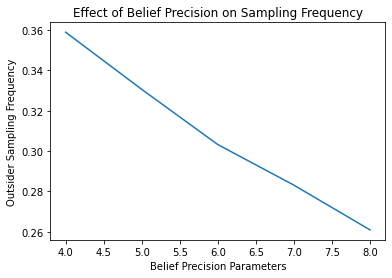

In [113]:
plt.plot(b_precision_gammas[1:], sampling_data[1:])
plt.xlabel("Belief Precision Parameters")
plt.ylabel("Outsider Sampling Frequency")
plt.title("Effect of Belief Precision on Sampling Frequency")

In [ ]:
    #what are the db indices for these parameters?
    b_db_indices = params.db_indices[b_indices]
    #what is the smallest one?
    lowest_db_index = np.where(c_db_indices == min(c_db_indices))[0][0]
    highest_db_index = np.where(c_db_indices == max(c_db_indices))[0][0]
    #print(c_db_indices[lowest_db_index])
    
    #what is the parameter combination that results in the smallest one?
    optimal_params = list(params.get_param_combinations())[c_indices[lowest_db_index]]
    suboptimal_params = list(params.get_param_combinations())[c_indices[highest_db_index]]
   # (ecb_precision_opt, env_precision_opt, b_precision_opt),idea_mappings_opt = get_params(optimal_params)
 #   (ecb_precision_sopt, env_precision_sopt, b_precision_sopt),idea_mappings_sopt = get_params(suboptimal_params)

    
    clustering_data[c] = {"optimal_params" : optimal_params, "lowest_db":c_db_indices[lowest_db_index],
                         # "real_params_opt" : (ecb_precision_opt, env_precision_opt, b_precision_opt),
                          
                         "suboptimal_params": suboptimal_params, "highest_db" : c_db_indices[highest_db_index]}
                         
                        # "real_params_subopt": (ecb_precision_sopt, env_precision_sopt, b_precision_sopt) }

In [213]:
#make a line plot of the sampling effect 

view_counts = np.zeros((len(b_precision_gammas), len(num_agent_values), int(num_agent_values[-1]),int(num_agent_values[-1]),30)) #(belief precisions, 4,9,9)
belief_strengths = np.zeros((len(b_precision_gammas), len(num_agent_values), int(num_agent_values[-1]),30))
for i, b in enumerate(b_precision_gammas):
    #find all parameter combinations with this connectedness value
    b_indices = np.where(np.isin(np.array(list(params.get_param_combinations()))[:,3],b))[0]
    parameters = [list(params.get_param_combinations())[b] for b in b_indices]
    average_outsider_sampling_events = []
    for p in parameters:

        try:
            for agent in range(p[0]):
                for t in range(30):
                    result, trial, agent, cluster1, cluster2, agent_data = find_one_agent_two_neighbours_opposite_cluster(p, False, t, agent) 
                    neighbours = np.where(agent_data[0][t] == 1)[0]
                    agent_samplings = agent_data[2][t]
                    final_beliefs = agent_data[1]
                    belief = np.mean(final_beliefs[t,:,0])
                    if belief < 0.5:
                        belief = 1-belief
                    belief_strengths[i, int(num_agent_values.index(p[0])), int(agent),t] = belief
                    for s in agent_samplings:
                        view_counts[i, int(num_agent_values.index(p[0])), int(agent), int(s),t] += 1
        except:
            continue        





invalid parameter combination encountered
invalid parameter combination encountered
invalid parameter combination encountered
invalid parameter combination encountered


In [214]:
normalized_vc = np.zeros((len(b_precision_gammas), len(num_agent_values), int(num_agent_values[-1]),int(num_agent_values[-1]),30)) #(belief precisions, 4,9,9)


In [215]:
view_counts.shape

(6, 4, 9, 9, 30)

In [216]:
for t in range(30):
    for n in range(len(num_agent_values)):
        for a in range(9):
            for a2 in range(9):
                normalized_vc[:,n,a,a2,t] = view_counts[:,n,a,a2,t] / np.sum(view_counts[:,n,a,a2,t])

<ipython-input-216-825cbb7692b5>:5: RuntimeWarning: invalid value encountered in true_divide
  normalized_vc[:,n,a,a2,t] = view_counts[:,n,a,a2,t] / np.sum(view_counts[:,n,a,a2,t])


In [217]:

n = 3

sampling_counts = np.zeros((len(b_precision_gammas), num_agent_values[n],30))
agent_beliefs = np.zeros((len(b_precision_gammas),num_agent_values[n],30))
for t in range(30):
    for b in range(len(b_precision_gammas)):
        for s in range(9):
            counts = np.sum(np.delete(normalized_vc[b,n,:,s,t],s))
            sampling_counts[b,s,t] = counts
            belief = belief_strengths[b,n,s,t]
            print(belief)
            agent_beliefs[b,s,t] = belief
    #print(view_counts[b,3,:].shape)
    #sns.heatmap(normalized_vc[b,n,:,:])
    #plt.show()

22
0.8856133287982401
0.8543985616357769
0.979895980090483
0.9162573062326692
0.9042442885213139
0.9838014676272556
0.9844597226895435
0.9752120680717244
0.97379293091986
0.9729298266999277
0.9715303496555504
0.9655511322267291
0.906398428598451
0.9036969377604587
0.9245645845271412
0.9280746806290938
0.9629357779972164
0.8832920918125023
0.8888116633427176
0.8741173483483662
0.9191699130977343
0.9746350068649459
0.968932972847238
0.975127574104127
0.9240909575322529
0.9733071475037742
0.887708969104903
0.9012628862386164
0.9666251558059609
0.9711965827020249
0.8120680795339678
0.8520617839431612
0.9773361643384749
0.781377721710895
0.7771302050825062
0.9514811189296178
0.819710472829685
0.8814772570089217
0.934489239683723
0.9116102935006696
0.8411456066390585
0.7899394220630418
0.9458182585418864
0.901637122255135
0.9241776774324366
0.9034399270635248
0.8990383728639816
0.9299097296516996
0.8885233598523736
0.9266882689040566
0.6177394767962694
0.9352717678605912
0.8019043181298282
0

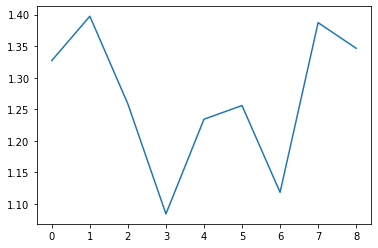

In [238]:
plt.plot(range(9), np.mean(sampling_counts[3],axis=1))


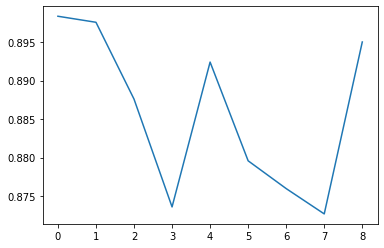

In [239]:
plt.plot(range(9), np.mean(agent_beliefs[3],axis=1))


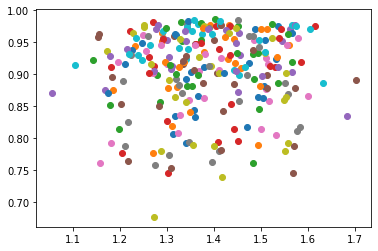

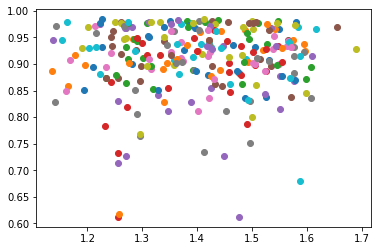

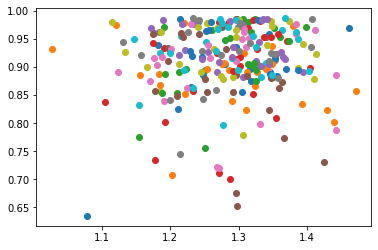

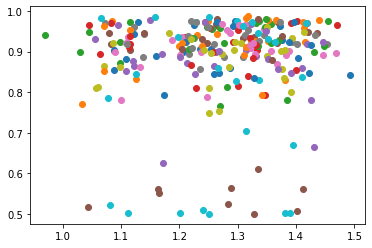

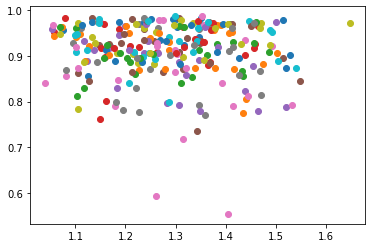

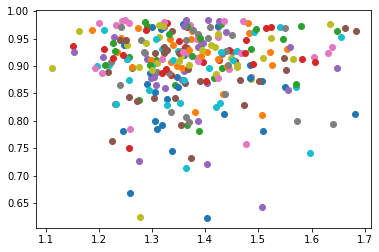

In [225]:

for b in range(len(b_precision_gammas)):    

    for t in range(30):
    #plt.bar(range(9), sampling_counts[i])
    #plt.show()
    # plt.bar(range(9), agent_beliefs[i])
    #plt.show()
    #print(agent_beliefs[0,:,t])
        plt.scatter(sampling_counts[b,:,t], agent_beliefs[b,:,t])
    plt.show()


In [186]:
sampling_counts.shape

(6, 9, 30)